# Exploratory Data Analysis of Whole Dataset

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('max_colwidth', 150)
plt.rcParams["figure.dpi"] = 100


### Load Dataset

In [2]:
df = pd.read_csv('../../data/all-data.csv', encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231216 entries, 0 to 231215
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   source    231216 non-null  object
 1   category  231216 non-null  object
 2   heading   231214 non-null  object
 3   content   231216 non-null  object
dtypes: object(4)
memory usage: 7.1+ MB


As we are not using `heading` column in our project, we will just fill empty headings with empty strings.

In [3]:
df.heading.fillna('', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231216 entries, 0 to 231215
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   source    231216 non-null  object
 1   category  231216 non-null  object
 2   heading   231216 non-null  object
 3   content   231216 non-null  object
dtypes: object(4)
memory usage: 7.1+ MB


### Number of news articles from different news sources

The data was collected from 10 different news sources.

- *Nepalkhabar* and *Onlinekhabar* has the **most** number of documents.
- *Educationpati* and *Nepalipatra* has the **least** number of documents.

<AxesSubplot:title={'center':'No. of articles by news source'}>

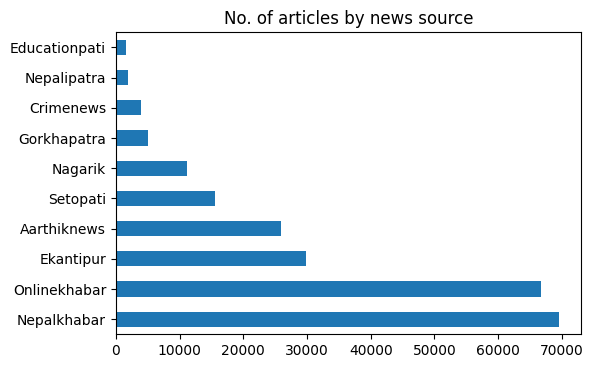

In [36]:
df.source.value_counts().plot.barh(title='No. of articles by news source')

### Number of news articles in different categories

The news articles are categorized into 20 different categories.

- *Politics* has **most** number of articles.
- *Employment* has the **least** number of articles.

<AxesSubplot:title={'center':'No. of documents by news category'}>

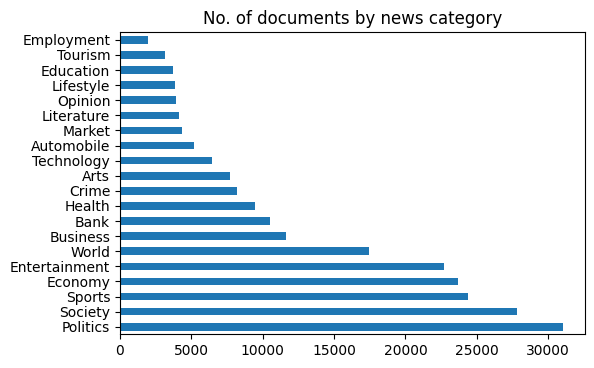

In [37]:
df.category.value_counts().plot.barh(title='No. of documents by news category')

### Group number of news articles by Category and Source

In [38]:
df.groupby(['category', 'source'])['content'].count()

category    source      
Arts        Nagarik         2559
            Setopati        5153
Automobile  Aarthiknews      900
            Nepalkhabar      739
            Onlinekhabar    1534
                            ... 
Tourism     Onlinekhabar    1811
            Setopati         154
World       Ekantipur       7036
            Nepalkhabar     2565
            Onlinekhabar    7830
Name: content, Length: 68, dtype: int64

### Adding Content and Heading word length

To visualize the word length distribution of *news headings* and *news contents*, we add a calculated column to count number of words.

In [4]:
df['content_word_length'] = df.content.str.split().str.len()
df['heading_word_length'] = df.heading.str.split().str.len()

As most number of articles has the content length less than 1000, we see the histogram for only this subset.

array([[<AxesSubplot:title={'center':'content_word_length'}>]],
      dtype=object)

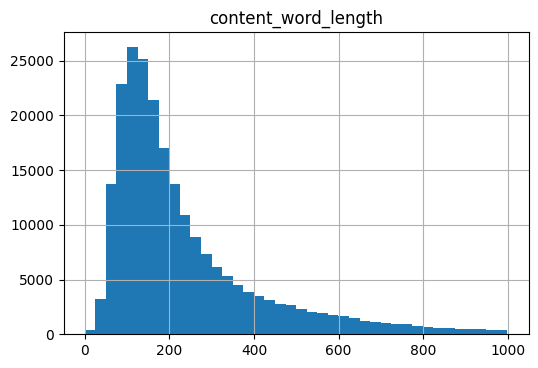

In [50]:
df[df.content_word_length < 1000].hist(column='content_word_length', bins=40)

In [51]:
df.content_word_length.describe()

count    231216.000000
mean        273.403108
std         301.386793
min           0.000000
25%         116.000000
50%         178.000000
75%         309.000000
max        8433.000000
Name: content_word_length, dtype: float64

array([[<AxesSubplot:title={'center':'heading_word_length'}>]],
      dtype=object)

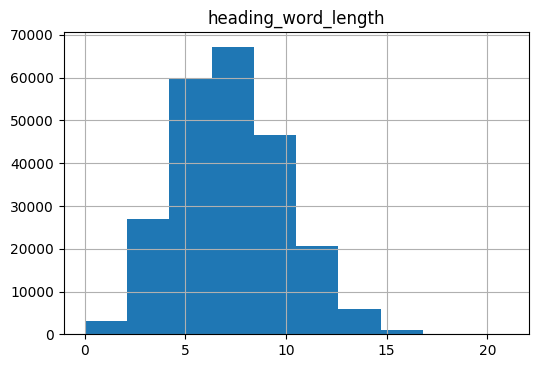

In [54]:
df.hist(column='heading_word_length', bins=10)

In [52]:
df.heading_word_length.describe()

count    231216.000000
mean          7.388684
std           2.569976
min           0.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          21.000000
Name: heading_word_length, dtype: float64